In [225]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from models.HH import *
from models.LIF import * 
from models.Ishikevich import *
from models.morrislecar import *
from utils.load import *
import matplotlib.animation as animation

In [226]:
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)


#### Subthreshold Comparisson

In [277]:
params_HH = load_HH()
params_LIF = load_LIF()
params_IZH = load_ISH(a = 0.6, k_u = 0.05, b = -1.3)
params_ML = load_ML(Ena = 91, Ek = -110)

HH parameters

In [278]:
k = 0.012 #strength of the gap junction coupling
Isyn = [ [0, 0.05] , [0, 0.05]] #delta peak of the chemical synapse
tau = 1 #time constant for the chemical coupling equations

#filtering order
order = 2

#Initial conditions of the HH model important quantities
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 

#time constants
dt = 0.01
t_final = 300

#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1

#data2aHH, completeHH = rk_simplemodel(dt,t_final,2,[V0,V0],[n0,n0],[m0,m0],[h0,h0],gna,gk,gl,Ena,Ek,El,C,I1,Isyn,k,tau)
data2aHH, completeHH_2a = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I1,Isyn,k,tau)
data2, completeHH_2a_2 = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I2,Isyn,k,tau)

Integrate and fire parameters

In [279]:
#Same as before
k = 0.012
tau = 1
Isyn = [[0, 0.05], [0.05, 0]]

#filtering order
order = 2

#Initial conditions for the LIF
y0 = [-70, -70]

#Time conditions
t_final = 300
dt = 0.01 
data2aIF, completeIF_2a = rk_if(dt,t_final,order,y0,*params_LIF,I1,Isyn,k,tau,1)
data2b, complete_IF_2a = rk_if(dt,t_final,order,y0,*params_LIF,I2,Isyn,k,tau,1)

Izhikevich Parameters

In [280]:
k_izh = 0.04
dt = 0.01
t_final = 300
Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(4999,15000):
    I1[i,0] = 1.5
    I2[i,0] = -1.5
order = 2
y0 = [-70,-70]
u0 = [0.0,0.0]


data2Ish, completeIsh1 = rk_ish(dt,t_final,order,y0,u0,I1,Is,*params_IZH,k_izh,tau)
data2ish, completeIsh2 = rk_ish(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau)

Morris-Lecar

In [281]:
k_ML = 0.008
tau = 1
Isyn = [[0, 0.05], [0.05, 0]]
Isyn = np.array(Isyn)

#filtering order
order = 2

#Initial conditions for the ML
y0 = [ -71.7061740390072, -71.7061740390072]
w0 = [0.0007223855976593603, 0.0007223855976593603]

#Time conditions
t_final = 300
dt = 0.01 
#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))


for i in range(4999,15000):
    I1[i,0] = 0.5 #changes the amplitude
    I2[i,0] = -0.5

data2aML, completeML = rk_ml(dt,t_final,2,y0,w0,*params_ML,I1,Isyn,k_ML,tau)
data2ML, completeML2 = rk_ml(dt,t_final,2,y0,w0,*params_ML,I2,Isyn,k_ML,tau)

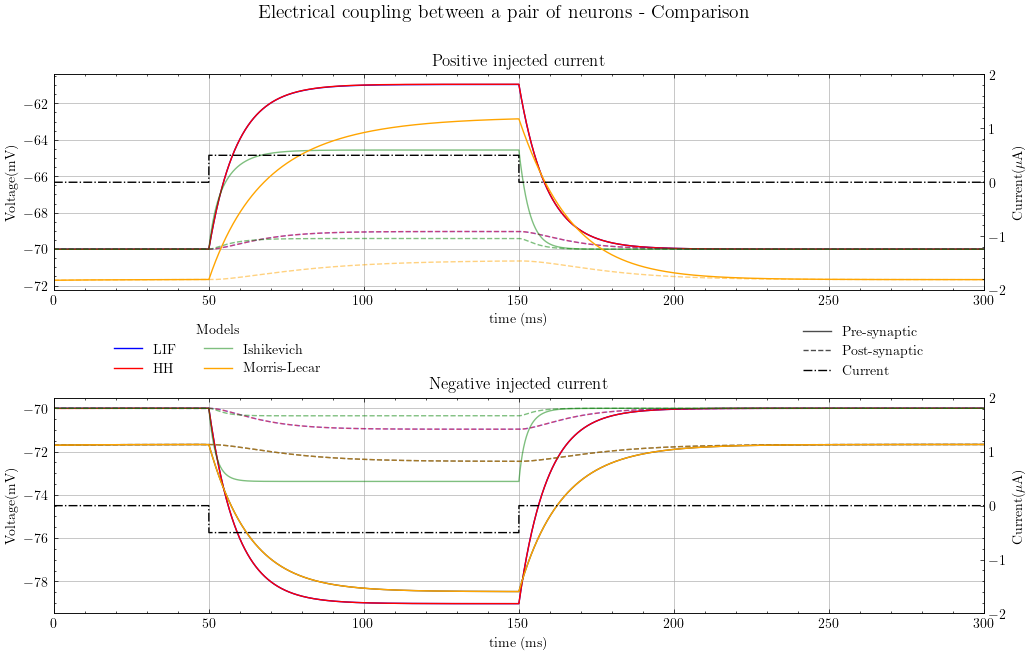

In [282]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')


ax3 = ax1.twinx()
ax4 = ax2.twinx() 
ax1.title.set_text('Positive injected current')
ax2.title.set_text('Negative injected current')

color = 'black'

ax3.set_ylabel(r'Current($\mu$A)', color = color)
ax4.set_ylabel(r'Current($\mu$A)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)
ax4.tick_params(axis = 'y', labelcolor = color)

ax3.set_ylim(-2,2)
ax4.set_ylim(-2,2)

fig.suptitle('Electrical coupling between a pair of neurons - Comparison',fontsize=14)
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)
lns1 = ax1.plot(time,data2aIF[:,0], label = 'LIF', color = 'b')
lns2 = ax1.plot(time,data2aHH[:,0], label = 'HH', color = 'r' )
lns3 = ax1.plot(time,data2aIF[:,1], 'b--', alpha = 0.5)
lns4 = ax1.plot(time,data2aHH[:,1], 'r--', alpha = 0.5)
lns5 = ax1.plot(time,data2Ish[:,0], label = 'Ishikevich', color = 'g', alpha = 0.5)
lns6 = ax1.plot(time,data2Ish[:,1], 'g--', alpha = 0.5)
lns7 = ax1.plot(time,data2aML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax1.plot(time,data2aML[:,1], '--',color = 'orange', alpha = 0.5)
lnsc = ax3.plot(time,I1[:,0],'-.', color = 'black')

lns1 = ax2.plot(time,data2b[:,0], label = 'LIF', color = 'b')
lns2 = ax2.plot(time,data2[:,0], label = 'HH', color = 'r')
lns3 = ax2.plot(time,data2b[:,1],'b--', alpha = 0.5)
lns4 = ax2.plot(time,data2[:,1], 'r--', alpha = 0.5)
lns5 = ax2.plot(time,data2ish[:,0], label = 'Izhikevich', color = 'g', alpha = 0.5)
lns6 = ax2.plot(time,data2ish[:,1], 'g--', alpha = 0.5)
lnsp = ax2.plot(time,data2ML[:,0], label = 'Pre-synaptic', alpha=0.7,color = 'black')
lnss = ax2.plot(time,data2ML[:,1], '--',color = 'black', alpha = 0.7, label = 'Post-synaptic')
lns7 = ax2.plot(time,data2ML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax2.plot(time,data2ML[:,1], '--',color = 'orange', alpha = 0.5)

lnsc = ax4.plot(time,I2[:,0],'-.', label= 'Current',color = 'black')

#ax1.set_ylim(-71.71,-71.71)
#ax1.set_xlim(2950,3000)

#ax2.set_ylim(-71.707,-71.704)
#ax2.set_xlim(2950,3000)
lns = lnsp + lnss + lnsc
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc = (0.8,1.07))

ax1.grid()
ax2.grid()
ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 2 )
plt.show()

In [283]:
El = -70
variationHHgj = np.zeros((len(data2aHH[:,0]),1))
deltav1 = np.array(abs(El-data2aHH[:,0]))
deltav2 = np.array(abs(El-data2aHH[:,1]))
gj_transmission = deltav2 / deltav1
variationHHgj[:,0] = gj_transmission

variationLIFgj = np.zeros((len(data2aIF[:,0]), 1))
deltav1 = np.array(abs(El - data2aIF[:,0]))
deltav2 = np.array(abs(El - data2aIF[:,1]))
gj_transmission = deltav2 / deltav1
variationLIFgj[:,0] = gj_transmission

variationIsh = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2Ish[:,0]))
deltav2 = np.array(abs(El - data2Ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh[:,0] = gj_transmission

variationIsh2 = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2ish[:,0]))
deltav2 = np.array(abs(El - data2ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh2[:,0] = gj_transmission

variationML = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2aML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2aML[:,1]))
gj_transmission = deltav2 / deltav1
variationML[:,0] = gj_transmission

variationML2 = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2ML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2ML[:,1]))
gj_transmission = deltav2 / deltav1
variationML2[:,0] = gj_transmission


/tmp/ipykernel_6709/3862380659.py:5: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_6709/3862380659.py:11: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_6709/3862380659.py:17: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_6709/3862380659.py:23: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1


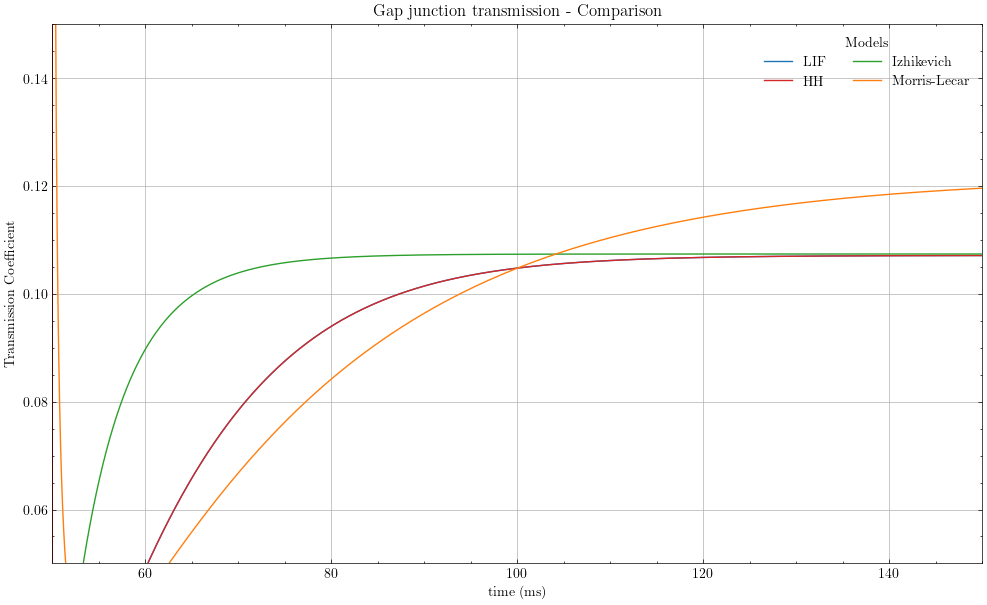

In [284]:
t_final = 300
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('time (ms)')
plt.ylabel('Transmission Coefficient')

plt.xlim(50,150)
plt.ylim(0.05,0.15)

plt.plot(time,variationLIFgj, color = 'tab:blue', label = 'LIF')
plt.plot(time,variationHHgj, color = 'tab:red' ,label = 'HH')
plt.plot(time,variationIsh, color = 'tab:green',label = 'Izhikevich')
plt.plot(time,variationML, color = 'tab:orange', label = 'Morris-Lecar')
#plt.plot(time,variationIsh2, color = 'red',label = 'Ishikevich2')
#plt.plot(time,variationML2, color = 'black', label = 'Morris-Lecar2')
plt.title('Gap junction transmission - Comparison')
plt.legend(title='Models',ncols=2)
plt.grid()

#### Trace Comparisson

In [250]:
#Initial conditions & the intensity
v0 = -65 
n0 = 0
m0 = 0
h0 = 0
y0 = [v0,n0,m0,h0]
Isyn = np.zeros(([2 , 2 ]))
I = [2.5, 0]
#variables related to the numerical integration of the problem
dt = 0.001
t_final = 300

data_HH, residue_HH = rk_Icst(dt,t_final,2,[v0,v0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,0,1)

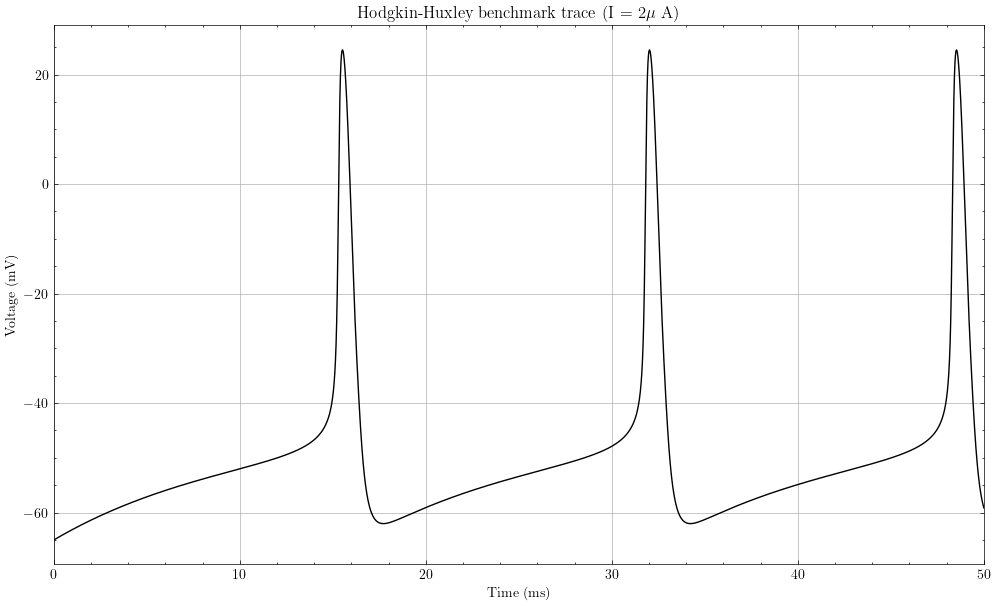

In [251]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data_HH[:,0], color = 'black')
plt.title(r'Hodgkin-Huxley benchmark trace (I = 2$\mu$ A)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(0,50)
plt.grid()


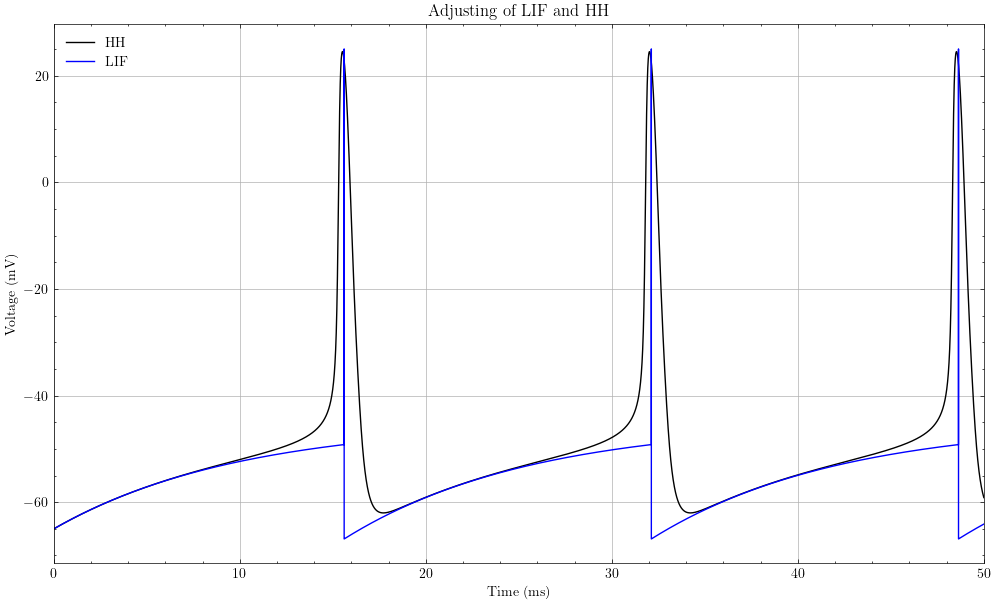

In [252]:
#Initial conditions & the intensity
Isyn = np.zeros(([2 , 2 ]))
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 2.5
    I2[i,0] = 0
#variables related to the numerical integration of the problem
dt = 0.001
t_final = 300
y0 = [-65, -65]

data2aIF, completeIF_2a = rk_if(dt,t_final,2,y0,*params_LIF,I1,Isyn,0,1,1)
me = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data_HH[:,0], color = 'black', label = 'HH')
plt.plot(time,data2aIF[:,0], color = 'blue', label = 'LIF')
plt.title(r'Adjusting of LIF and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,50)
plt.grid()

In [238]:
#Capacity
C = 1

#Resting and threshold potentials
vr = -70 #-70
vt = 48.5
k_2 = 0.0
k_u = 0.05

k_ish = 0.019 #neuron's rheobase
c = -60 #-70#voltage reset value

a = 0.6 #recovery time constant
b = -1.3 #neuron's input resistance 
d = 100#total amount of outward minus inwards currents activating during the spike
vpeak = 25
dt = 0.001
t_final = 300
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 2.5
    I2[i,0] = 0
order = 2
y0 = [-65,-65]
u0 = [0.0,0.0]

data2Ish_new, completeIsh1_new = rk_ish(dt,t_final,order,y0,u0,I1,Is,C,vr,vt,k_ish,a,b,c,d,vpeak,k_u,k_2,tau)

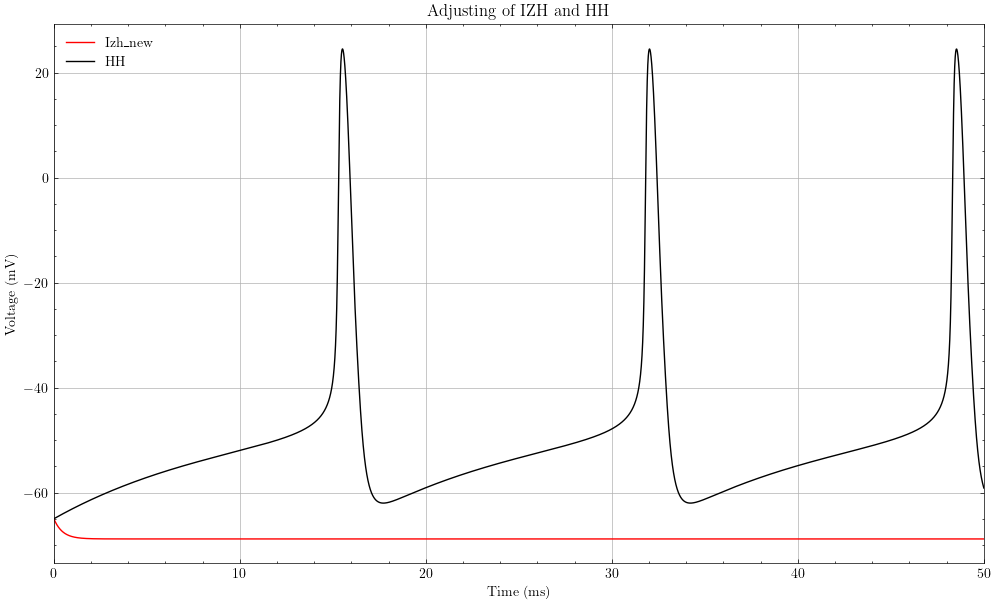

In [239]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data2Ish_new[:,0], color = 'red', label = 'Izh_new')
#plt.plot(time,data2Ish[:,0], color = 'tab:green', label = 'IZH_old')
plt.plot(time,data_HH[:,0], color = 'black', label = 'HH')

plt.title(r'Adjusting of IZH and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,50)
plt.grid()

In [240]:
Ena = 91
Ek = -100
Eshunt = -75

V1 = -3
V2 = 20
V3 = -3
V4 = 19


gna = 2 # 1.39
gk = 2 #1.39
gshunt = 0.085#1/6 

C = 1
psi = 0.93



k = 0.00
dt = 0.001
t_final = 300
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I1[i,0] = 2.5
    I2[i,0] = 0
order = 2
y0 = [-65 , -65]
w0 = [0.00, 0.00]

data2aML, completeML = rk_ml(dt,t_final,2,y0,w0,psi,V1,V2,V3,V4,gna,gk,gshunt,Ena,Ek,Eshunt,C,I1,Is,k,tau)

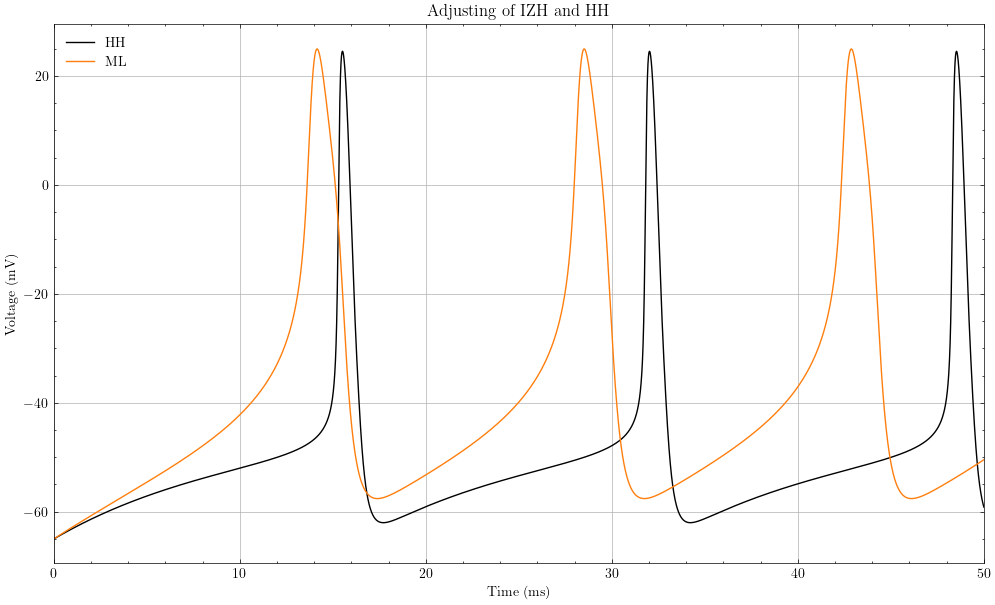

In [241]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data_HH[:,0], color = 'black', label = 'HH')
plt.plot(time,data2aML[:,0], color = 'tab:orange', label = 'ML')
plt.title(r'Adjusting of IZH and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,50)
plt.grid()

##### Efficiency

HH model

In [27]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0


for i in range(0,len(f)):
    I[:,0] = 1 + 0.7*np.sin(2 * np.pi * f[i] * t)
    data4b_HH, completeHH_4b = rk_simplemodel(dt,t_final,1,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)
    end = len(data4b_HH)
    if i < 9:
        mean[i] = ( np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]) ) / ( np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]) )
        time_diff, residue = phases(data4b_HH[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff

    else:
        mean[i] = ( np.max(data4b_HH[80000:end-1,1]) - np.min(data4b_HH[80000:end-1,1]) ) / ( np.max(data4b_HH[80000:end-1,0]) - np.min(data4b_HH[80000:end-1,0]) )
        time_diff, residue = phases(data4b_HH[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff

f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100

fHH = f
meanHH = mean 
phasesHH = phases_test

LIF model

In [28]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
y0 = [-70,-70]
residue = 0

for i in range(0,len(f)):
    I[:,0] = 1+ np.sin(2 * np.pi * f[i] * t)
    data4b_IF, complete_IF_4b = rk_if(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,1)
    end = len(data4b_IF)
    if i < 9:
        mean[i] = ( np.max(data4b_IF[10000:,1]) - np.min(data4b_IF[10000:,1]) ) / ( np.max(data4b_IF[10000:,0]) - np.min(data4b_IF[10000:,0]) )
        time_diff, residue = phases(data4b_IF[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
    else:
        mean[i] = ( np.max(data4b_IF[80000:end-1,1]) - np.min(data4b_IF[80000:end-1,1]) ) / ( np.max(data4b_IF[80000:end-1,0]) - np.min(data4b_IF[80000:end-1,0]) )
        time_diff, residue = phases(data4b_IF[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff

f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100
fIF= f 
meanIF = mean 
phasesIF = phases_test

Ishikevich model

In [29]:

t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0


for i in range(0,len(f)):
    I[:,0] = 1.0 + 0.5*np.sin(2 * np.pi * f[i] * t)
    #data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,C,I,Is,vr,vt,k_ish,a,b,c,d,k_2,tau,vpeak)
    data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)
    end = len(data4b_Ish)
    if i < 9:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish[10000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
    else:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish,dt)
        phases_test[i] = 360 * f[i] * time_diff
f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]
    #print(mean[0],mean[i])

mean[0] = 100

fISH = f
meanISH = mean 
phasesISH= phases_test

Morris-Lecar model

In [30]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))
residue = 0
phases_test = np.zeros((len(f),1))


for i in range(0,len(f)):
    I[:,0] = 0.3 + 0.4*np.sin(2 * np.pi * f[i] * t)
    data4b_ML, complete_ML_4b = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)
    end = len(data4b_ML)
    if i < 9:
        mean[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )
        time_diff, residue = phases(data4b_ML[5000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
    elif i == 9:
        mean[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )
        time_diff, residue = phases(data4b_ML[70000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
    else:
        mean[i] = ( np.max(data4b_ML[10000:end-1,1]) - np.min(data4b_ML[10000:end-1,1]) ) / ( np.max(data4b_ML[10000:end-1,0]) - np.min(data4b_ML[10000:end-1,0]) )
        time_diff, residue = phases(data4b_ML[72000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]


mean[0] = 100
fML= f 
meanML = mean 
phasesML= phases_test

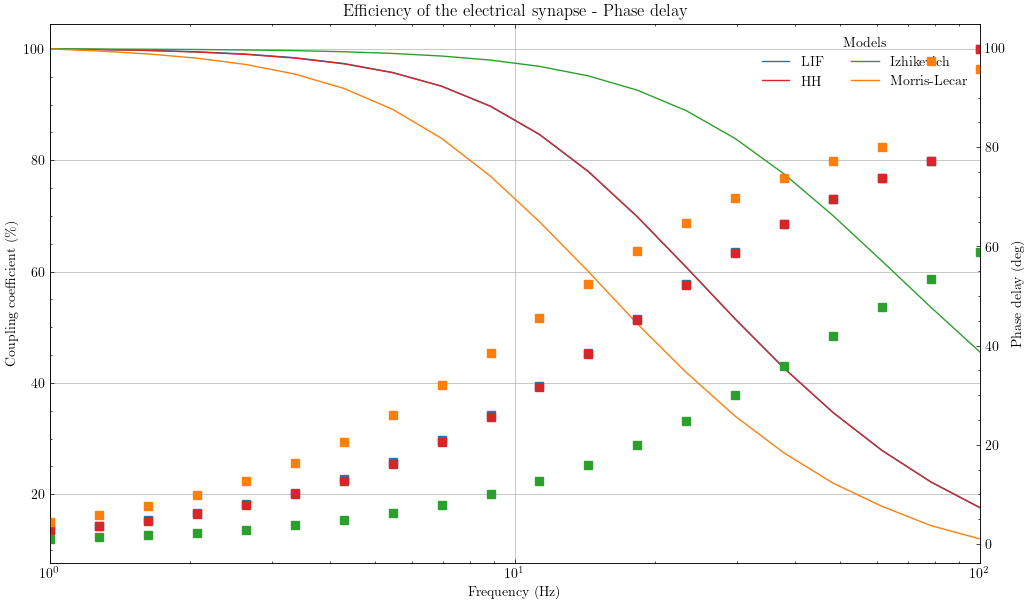

In [31]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Phase delay')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient (\%)')
ax1.set_xlim(1,100)

ax2.set_ylabel('Phase delay (deg)')

ax2.plot(fIF,phasesIF, 's', color = 'tab:blue')
ax2.plot(fHH,phasesHH, 's', color = 'tab:red')
ax2.plot(fISH,phasesISH, 's', color = 'tab:green')
ax2.plot(fML,phasesML, 's', color = 'tab:orange')

ax1.plot(fIF,meanIF, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,meanHH, color = 'tab:red',label= 'HH')
ax1.plot(fISH, meanISH,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,meanML, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2)
ax1.grid()